In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data from the dataset
cust=pd.read_csv("C:\\Users\\parni\\Satya_GreatLearning\\CourseContent\\Week-7-8-Assignment\\Wholesale Customers Data.csv")

In [3]:
#to get the information of the dataset
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.0+ KB


Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customers Data.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel/Restaurant/Café HoReCa, Retail).

1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

In [4]:
#to summarize the data using describe()
cust.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [6]:
#summarize the data using methods of descriptive statistics.
print("Mean of the Fresh = ",cust['Fresh'].mean())
print("Variance of the Fresh = ",cust['Fresh'].var())
print("Standard Deviation of the Fresh = ",cust['Fresh'].std())
print("Max of the Fresh = ",cust['Fresh'].max())
print("Min of the Fresh = ",cust['Fresh'].min())
print("Median of the Fresh = ",cust['Fresh'].median())
#similarly we can obtain for various variables of the data
#but, to avoid the redundant typing, describe() is best for summarizing the data

Mean of the Fresh =  12000.297727272728
Variance of the Fresh =  159954927.4214072
Standard Deviation of the Fresh =  12647.328865076894
Max of the Fresh =  112151
Min of the Fresh =  3
Median of the Fresh =  8504.0


In [5]:
#to get the first five rows of the dataset.
cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [6]:
#to get the total expenditure of each row
cust['total'] = cust['Fresh']+cust['Milk']+cust['Grocery']+cust['Frozen']+cust['Detergents_Paper']+cust['Delicatessen']
cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [12]:
#to get the region and channel that spends less
#pd.pivot_table(cust, index=['Region', 'Channel'], values=['Buyer/Spender','total'], aggfunc=min)
pd.pivot_table(cust, index=['Region', 'Channel'], aggfunc=min)

Buyer/Spender  Delicatessen  Detergents_Paper  Fresh  Frozen  \
Region Channel                                                                 
Lisbon Hotel              197             7                 5    514      91   
       Retail             198           120               788     18      61   
Oporto Hotel              295            51                15      3     264   
       Retail             294            59               332    161     131   
Other  Hotel                4             3                 3      3      25   
       Retail               1             3               523     23      33   

                Grocery  Milk  total  
Region Channel                        
Lisbon Hotel        489   258   4925  
       Retail      5265  2527  18342  
Oporto Hotel       1330   333   4129  
       Retail      2743   928  17598  
Other  Hotel          3    55    904  
       Retail      4523  1124  14993

In [10]:
#to get the region and channel that spends more
pd.pivot_table(cust, index=['Region', 'Channel'], aggfunc=max)

Buyer/Spender  Delicatessen  Detergents_Paper   Fresh  Frozen  \
Region Channel                                                                  
Lisbon Hotel              273          6854              5828   56083   18711   
       Retail             269          6372             19410   20782    8321   
Oporto Hotel              340          5609              1679   32717   60869   
       Retail             336          3508             38102   27082   11559   
Other  Hotel              440         47943              6907  112151   36534   
       Retail             438         16523             40827   44466    8132   

                Grocery   Milk   total  
Region Channel                          
Lisbon Hotel      16966  23527   73243  
       Retail     39694  28326  107155  
Oporto Hotel      13626  16784  130877  
       Retail     67298  25071  120291  
Other  Hotel      21042  43950  190169  
       Retail     92780  73498  199891

From the above, pivot_tables, the region and channel that spends the least is 'Hotel Channel in the Other Region (Buyer/Spender = 4)'. While, the region and channel spending the most is the 'Retail channel in Other region (Buyer/Spender = 438)'.

1.2. There are 6 different varieties of items are considered.
Do all varieties show similar behaviour across Region and Channel?

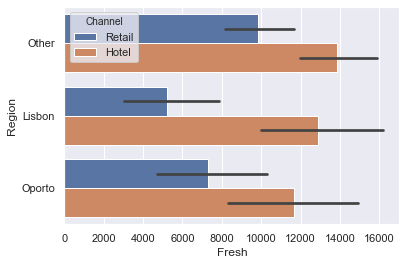

In [26]:
#to obtain the behaviour of the different items across region and channel
sns.barplot(cust['Fresh'], cust['Region'], hue=cust['Channel'])

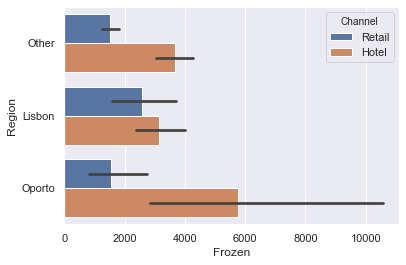

In [27]:
sns.barplot(cust['Frozen'], cust['Region'], hue=cust['Channel'])

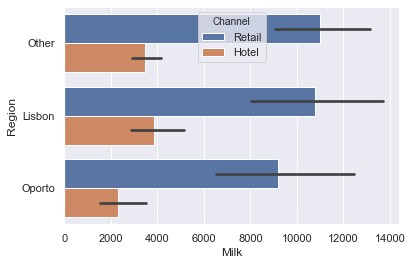

In [28]:
sns.barplot(cust['Milk'],cust['Region'], hue=cust['Channel'])

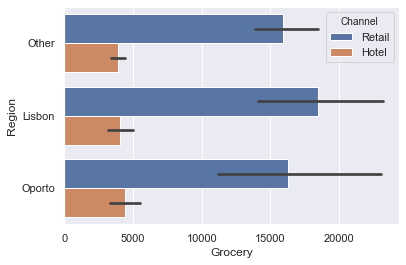

In [29]:
sns.barplot(cust['Grocery'],cust['Region'], hue=cust['Channel'])

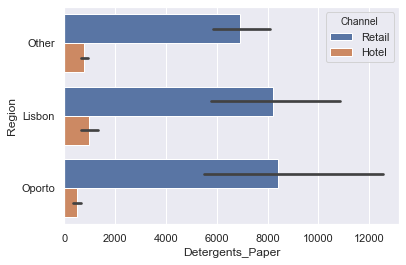

In [30]:
sns.barplot(cust['Detergents_Paper'],cust['Region'], hue=cust['Channel'])

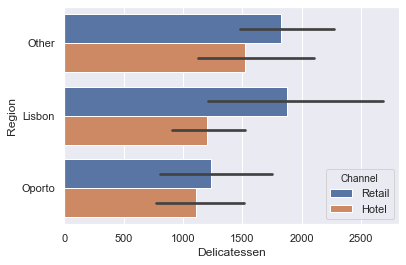

In [31]:
sns.barplot(cust['Delicatessen'],cust['Region'], hue=cust['Channel'])

In [32]:
cust.kurt()

Buyer/Spender        -1.200000
Fresh                11.536408
Milk                 24.669398
Grocery              20.914670
Frozen               54.689281
Detergents_Paper     19.009464
Delicatessen        170.694939
total                13.544113
dtype: float64

In [33]:
 cust.skew()

Buyer/Spender        0.000000
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
total                3.028218
dtype: float64

In [34]:
cust.mean()

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
total               33226.136364
dtype: float64

In [36]:
cust.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
total               26356.301730
dtype: float64

From the above barplots and details on the mean, standard-deviation, skewness and kurtosis, we can analyse that the behaviour of the six differnt varieties of items across various regions and channels as follows--
a) The behaviour of 'Fresh' and 'Grocery' is similar. They exhibit high standard-deviation indicating the data is spread out in wide range of values.
b) 'Milk' and 'Delicatessen' of Retail channel show right-skewed distribution, as per the bar-plots.
c) The one similarity that we can see is that the kurtosis is not zero for any of the varities, and hence they are not normally distributed and also have heavy-tails. Especially, the 'data' of Delicatessen has the highest kurtosis and skewness compared to the others. 

Q 1.3: On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
Which items shows the least inconsistent behaviour?

In [40]:
#to obtain the mean of the different items
cust.mean()

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
total               33226.136364
dtype: float64

In [41]:
#to get the standard deviation for the different items
cust.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
total               26356.301730
dtype: float64

Answer 1.3: Based on the descriptive measure of variability, the item showing the most inconsistent behaviour is 'Fresh' (highest standard deviation implies more varied data) and the item showing the least inconsistent behaviour (least standard deviation) is 'Delicatessen'.

1.4 Are there any outliers in the data?

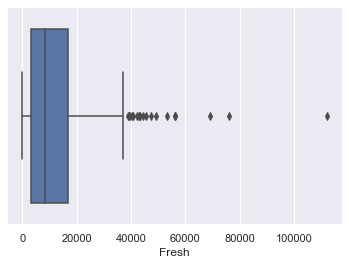

In [22]:
# to obtain the outliers in the data
sns.boxplot(x=cust['Fresh'])

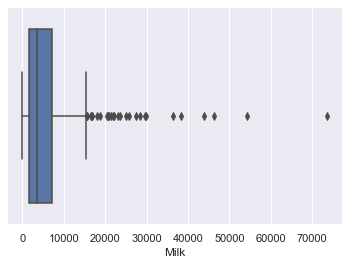

In [23]:
sns.boxplot(x=cust.Milk)

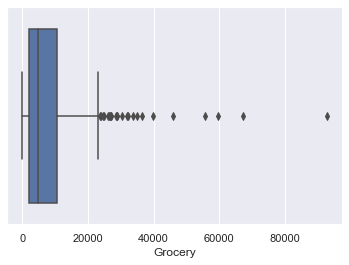

In [24]:
sns.boxplot(x=cust.Grocery)

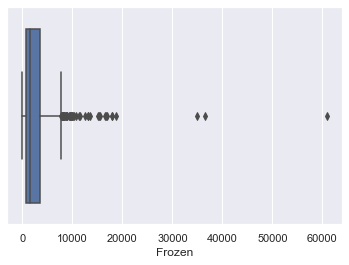

In [25]:
sns.boxplot(x=cust.Frozen)

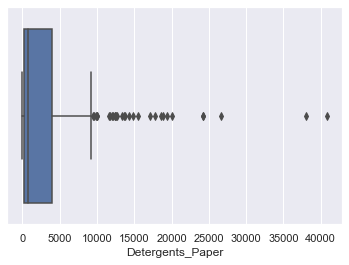

In [26]:
sns.boxplot(x=cust.Detergents_Paper)

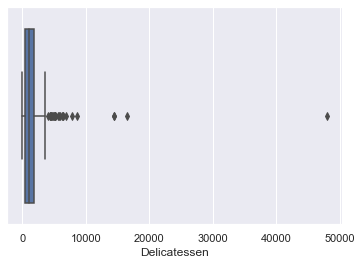

In [27]:
sns.boxplot(x=cust.Delicatessen)

As shown above, there are outliers in the data in Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicatessen variables.

1.5. On the basis of this report, what are the recommendations?

Answer 1.5: Based on this report, the following are the recommendations--

i) 'Fresh' is the most inconsistent variety in the dataset and hence, the variation for this variety needs to be reduced.

ii) The 'hotel channel in other region (buyer/spender = 4)' spends the least, need to find ways to improve the purchases here and the 'retail channel in other region (buyer/spender =438)' spends the most, we can find ways to maintain and concentrate on the spending of this as the revenue-generation scope here is very high. Similarly, should concentrate on the next best channels and regions that spend the most to increase the revenue (buyer/spender numbers are 440, 340, 336, 269 and 273).

iii) There are outliers in all the six different varieties. These outliers should be capped and the calculations have to done to analyse the data.